**Name** - Vasu Bansal

**Roll No.** - 045055

# Segmentation of Consumers using Bank Defaulters Data

## Objectives -
1. Identification of best variables to perform kmeans clustering.
2. Segmentation of Consumer Data from identified variables using Unsupervised Machine Learning Clustering Algorithms
3. Identification of Appropriate Number of Segments or Clusters
4. Determination of Segment or Cluster Characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA
import os
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from memory_profiler import memory_usage

df = pd.read_csv("bank defaulter dataset.csv")

## Data Description

**Source-** This Dataset is taken from Kaggle, who in turn took it from MachineHack - Deloitte Hackathon.

**Size of the Dataset**

In [2]:
file_name= "bank defaulter dataset.csv"
print("Size of Dataset is {} bytes".format(os.path.getsize(file_name)))
print("Size of Dataset is {} MB".format(os.path.getsize(file_name)>>20))

Size of Dataset is 16484188 bytes
Size of Dataset is 15 MB


In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


**Data Shape**

In [5]:
print("Basic Info about the Dataset:")
print()
df.info()

Basic Info about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                 

In [6]:
print("Dataset shape - ",df.shape)

Dataset shape -  (67463, 35)


## Description of Variables

**Finding Index Variables**

In [7]:
index_variables = []

for column in df.columns:
    # Check if the column data type is integer or float
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Check if the column has unique values, indicating it could be an index variable
        if len(df[column].unique()) == len(df):
            index_variables.append(column)

print("Index variables in the dataset are:", index_variables)

Index variables in the dataset are: ['ID']


**Code to identify variable type -**

CV - Categorical Variable

CNV - Categorical Nominal Variable

COV - Categorical Ordinal Variable

NCV - Non-Categorical Variable

In [8]:
# Separate columns into numerical and categorical
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize category counters
cv_counter = 1
cnv_counter = 1
cov_counter = 1
ncv_counter = 1

# Dictionary to store the categorized variables
categorized_variables = {}

# Iterate through columns and categorize variables
for col in df.columns:
    if col in numerical_columns:
        categorized_variables[col] = f'NCV{ncv_counter}'
        ncv_counter += 1
    elif col in categorical_columns:
        unique_values = df[col].nunique()
        if unique_values <= 2:
            categorized_variables[col] = 'CV'
        elif unique_values > 2 and unique_values <= 10:
            categorized_variables[col] = f'CNV{cv_counter}'
            cv_counter += 1
        else:
            categorized_variables[col] = f'COV{cov_counter}'
            cov_counter += 1

# Display categorized variables
for var, category in categorized_variables.items():
    print(f"{var}: {category}")

# Save categorized variables DataFrame to a new CSV file
categorized_variables_df = pd.DataFrame(list(categorized_variables.items()), columns=['Variable', 'Category'])
categorized_variables_df.to_csv('categorized_variables.csv', index=False)


ID: NCV1
Loan Amount: NCV2
Funded Amount: NCV3
Funded Amount Investor: NCV4
Term: NCV5
Batch Enrolled: COV1
Interest Rate: NCV6
Grade: CNV1
Sub Grade: COV2
Employment Duration: CNV2
Home Ownership: NCV7
Verification Status: CNV3
Payment Plan: CV
Loan Title: COV3
Debit to Income: NCV8
Delinquency - two years: NCV9
Inquires - six months: NCV10
Open Account: NCV11
Public Record: NCV12
Revolving Balance: NCV13
Revolving Utilities: NCV14
Total Accounts: NCV15
Initial List Status: CV
Total Received Interest: NCV16
Total Received Late Fee: NCV17
Recoveries: NCV18
Collection Recovery Fee: NCV19
Collection 12 months Medical: NCV20
Application Type: CV
Last week Pay: NCV21
Accounts Delinquent: NCV22
Total Collection Amount: NCV23
Total Current Balance: NCV24
Total Revolving Credit Limit: NCV25
Loan Status: NCV26


# Data Bifurcation

In [9]:
import pandas as pd

# Initialize empty lists to store column names
categorical_columns = []
non_categorical_columns = []

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the data type of the column is 'object', indicating it's categorical
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    # If the data type is not 'object', it's considered non-categorical
    else:
        non_categorical_columns.append(column)

# Create new DataFrames for categorical and non-categorical variables
df_cat = df[categorical_columns]
df_non_cat = df[non_categorical_columns]

In [10]:
# Display variables in df_cat
print("Categorical Variables:")
df_cat.columns

Categorical Variables:


Index(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Payment Plan', 'Loan Title',
       'Initial List Status', 'Application Type'],
      dtype='object')

In [11]:
# Display variables df_non_cat
print("\nNon-Categorical Variables:")
df_non_cat.columns


Non-Categorical Variables:


Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Total Received Interest', 'Total Received Late Fee',
       'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical',
       'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

## Descriptive Statistics

**Categorical Variables Description**

In [12]:
import pandas as pd

# DataFrame to store count and frequency statistics
df_cat_stats = pd.DataFrame()

# Count and frequency statistics for each column in catdf
for column in df_cat.columns:
    col_count = df_cat[column].value_counts().reset_index()
    col_count.columns = [column, 'Frequency']
    df_cat_stats = pd.concat([df_cat_stats, col_count], axis=1)

# Count of unique values in each categorical column
unique_counts = df_cat.nunique()

# Display the count and frequency statistics along with unique counts
print("\nSTATISTICS OF CATEGORICAL DATASET:\n")
print("Count and Frequency Statistics:\n", df_cat_stats)
print("\nNumber of Unique Values in each Categorical Column:\n", unique_counts)

# Summary for each column in catdf
df_cat_summary = df_cat.describe(include='all').transpose()


STATISTICS OF CATEGORICAL DATASET:

Count and Frequency Statistics:
     Batch Enrolled  Frequency Grade  Frequency Sub Grade  Frequency  \
0       BAT3873588     3626.0     C    19085.0        B4     4462.0   
1       BAT1586599     3142.0     B    18742.0        C1     4188.0   
2       BAT1104812     2996.0     A    12055.0        B3     3999.0   
3       BAT2252229     2557.0     D     8259.0        A5     3540.0   
4       BAT2803411     2425.0     E     6446.0        B2     3520.0   
..             ...        ...   ...        ...       ...        ...   
104            NaN        NaN   NaN        NaN       NaN        NaN   
105            NaN        NaN   NaN        NaN       NaN        NaN   
106            NaN        NaN   NaN        NaN       NaN        NaN   
107            NaN        NaN   NaN        NaN       NaN        NaN   
108            NaN        NaN   NaN        NaN       NaN        NaN   

    Employment Duration  Frequency Verification Status  Frequency  \
0       

In [13]:
# Display the summary
print("\nSummary Statistics for Categorical Columns:\n")
df_cat_summary


Summary Statistics for Categorical Columns:



,count,unique,top,freq
Batch Enrolled,67463,41,BAT3873588,3626
Grade,67463,7,C,19085
Sub Grade,67463,35,B4,4462
Employment Duration,67463,3,MORTGAGE,36351
Verification Status,67463,3,Source Verified,33036
Payment Plan,67463,1,n,67463
Loan Title,67463,109,Credit card refinancing,30728
Initial List Status,67463,2,w,36299
Application Type,67463,2,INDIVIDUAL,67340


In [14]:
# Calculate the proportion (relative frequency) for each categorical column
proportion_stats = df_cat.apply(lambda x: x.value_counts(normalize=True).idxmax() + ': ' + "{:.2%}".format(x.value_counts(normalize=True).max()))

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics:\n")
proportion_stats


Proportion (Relative Frequency) Statistics:



Batch Enrolled                       BAT3873588: 5.37%
Grade                                        C: 28.29%
Sub Grade                                    B4: 6.61%
Employment Duration                   MORTGAGE: 53.88%
Verification Status            Source Verified: 48.97%
Payment Plan                                n: 100.00%
Loan Title             Credit card refinancing: 45.55%
Initial List Status                          w: 53.81%
Application Type                    INDIVIDUAL: 99.82%
dtype: object

**For Non-Categorical Variables Description**

In [15]:
# DataFrame to store statistics
df_non_cat_stats = pd.DataFrame()

# Summary for each column in df_non_cat
df_non_cat_summary = df_non_cat.describe().transpose()

# Display the summary
print("\nSummary Statistics for Non-Categorical Columns:\n")
df_non_cat_summary


Summary Statistics for Non-Categorical Columns:



,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [16]:
# Calculate the proportion (relative frequency) for each non-categorical column
# Since non-categorical columns do not have proportions, we'll print N/A for them
proportion_stats_non_cat = pd.Series(["N/A"] * len(df_non_cat.columns), index=df_non_cat.columns)

# Display the proportion statistics
print("\nProportion (Relative Frequency) Statistics for Non-Categorical Columns:\n")
proportion_stats_non_cat


Proportion (Relative Frequency) Statistics for Non-Categorical Columns:



ID                              N/A
Loan Amount                     N/A
Funded Amount                   N/A
Funded Amount Investor          N/A
Term                            N/A
Interest Rate                   N/A
Home Ownership                  N/A
Debit to Income                 N/A
Delinquency - two years         N/A
Inquires - six months           N/A
Open Account                    N/A
Public Record                   N/A
Revolving Balance               N/A
Revolving Utilities             N/A
Total Accounts                  N/A
Total Received Interest         N/A
Total Received Late Fee         N/A
Recoveries                      N/A
Collection Recovery Fee         N/A
Collection 12 months Medical    N/A
Last week Pay                   N/A
Accounts Delinquent             N/A
Total Collection Amount         N/A
Total Current Balance           N/A
Total Revolving Credit Limit    N/A
Loan Status                     N/A
dtype: object

In [17]:
# Calculating correlation matrix
correlation_matrix = df_non_cat.corr()

# Displaying correlation matrix
print("\nCorrelation Matrix for Non-Categorical Variables:\n")
correlation_matrix


Correlation Matrix for Non-Categorical Variables:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.000000,-0.003480,-0.003302,0.002954,0.003226,0.004258,-0.004390,-0.010578,0.000568,-0.006628,...,0.006674,-0.001435,-0.001802,-0.002900,0.000907,NaN,0.003745,-0.003572,-0.005141,0.000472
Loan Amount,-0.003480,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.016691,0.007959,-0.000469,0.008962,...,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,NaN,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.003302,-0.000551,1.000000,0.010227,-0.001503,0.002310,-0.003518,0.002347,0.011313,-0.001587,...,0.001542,0.000462,0.000175,0.001071,-0.003476,NaN,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002954,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.001339,0.000112,0.001925,-0.003073,...,-0.000232,0.000966,-0.007272,0.001814,0.004248,NaN,0.006862,0.003283,0.005669,-0.000091
Term,0.003226,0.004277,-0.001503,-0.008943,1.000000,-0.012688,-0.021813,0.001026,-0.004494,-0.005272,...,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,NaN,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,0.004258,-0.004888,0.002310,-0.001917,-0.012688,1.000000,0.005467,-0.011203,0.004045,0.009172,...,0.003119,0.009348,0.001281,-0.009895,-0.012652,NaN,0.002771,-0.002567,0.016651,0.002900
Home Ownership,-0.004390,0.016691,-0.003518,0.001339,-0.021813,0.005467,1.000000,0.022781,-0.003793,0.005024,...,0.004011,0.004399,-0.003821,-0.002639,-0.004573,NaN,0.006314,0.007117,0.005008,0.003716
Debit to Income,-0.010578,0.007959,0.002347,0.000112,0.001026,-0.011203,0.022781,1.000000,-0.004007,0.002246,...,-0.010224,-0.009693,0.002200,-0.000716,0.008639,NaN,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,0.000568,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.003793,-0.004007,1.000000,0.014679,...,0.007943,0.017348,0.002707,0.003451,0.001160,NaN,0.005642,0.002602,0.009315,0.009990
Inquires - six months,-0.006628,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.005024,0.002246,0.014679,1.000000,...,0.008296,0.012487,0.008388,-0.004436,-0.004453,NaN,-0.002210,0.001531,0.004678,0.000578


Unique Grades Assigned by the Bank:
['B' 'C' 'F' 'A' 'G' 'E' 'D']


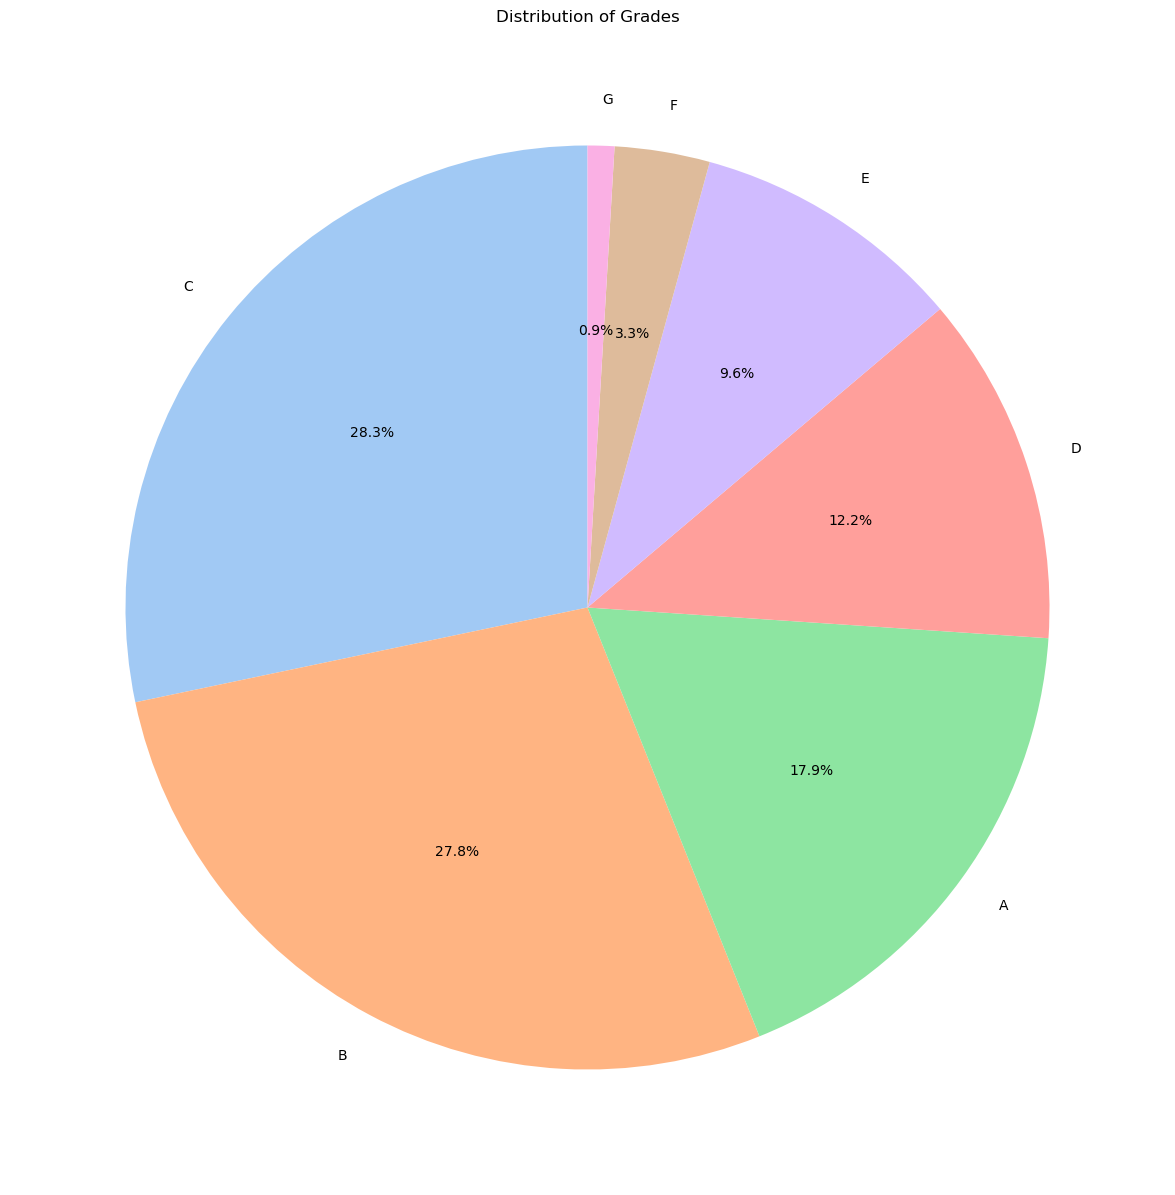

In [18]:
import matplotlib.pyplot as plt

# Extract unique grades
unique_grades = df['Grade'].unique()

# Display unique grades
print("Unique Grades Assigned by the Bank:")
print(unique_grades)

# Plot a pie chart for the distribution of grades
plt.figure(figsize=(15, 15))
plt.pie(df['Grade'].value_counts(), labels=df['Grade'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Grades')
plt.show()

## Data Pre-Processing

**Finding if there are any missing records**

In [19]:
# Find missing data in each column
missing_data = df.isnull()

# Count missing values for each column
missing_counts = missing_data.sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / len(df)) * 100

# Create a DataFrame to store missing data information
missing_info = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing': missing_percentage
})

# Display missing data information
print("\nMissing Data Information:")
print(missing_info)

# Save the missing data information DataFrame to a new CSV file
missing_info.to_csv('missing_data_information.csv')


Missing Data Information:
                              Missing Values  Percentage Missing
ID                                         0                 0.0
Loan Amount                                0                 0.0
Funded Amount                              0                 0.0
Funded Amount Investor                     0                 0.0
Term                                       0                 0.0
Batch Enrolled                             0                 0.0
Interest Rate                              0                 0.0
Grade                                      0                 0.0
Sub Grade                                  0                 0.0
Employment Duration                        0                 0.0
Home Ownership                             0                 0.0
Verification Status                        0                 0.0
Payment Plan                               0                 0.0
Loan Title                                 0                 0.

**Since there are no missing values we move onto the next step, that is, Numerical Encoding of Categorical Variables or Features.**

**Numerical Encoding of Categorical Variables**

In [20]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of df_cat to preserve the original DataFrame
df_cat_copy = df_cat.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in df_cat_copy and encode categorical variables
for column in df_cat_copy.columns:
    # Check if the column is of object type (categorical)
    if df_cat_copy[column].dtype == 'object':
        # Encode the categorical variable
        df_cat_copy[column] = label_encoder.fit_transform(df_cat_copy[column])

# Rename the DataFrame to df_cat_code
df_cat_code = df_cat_copy

In [21]:
# Print the head of df_cat and df_cat_code to show the difference
print("Head of df_cat:")
print()
df_cat.head()

Head of df_cat:



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,BAT2522922,B,C4,MORTGAGE,Not Verified,n,Debt Consolidation,w,INDIVIDUAL
1,BAT1586599,C,D3,RENT,Source Verified,n,Debt consolidation,f,INDIVIDUAL
2,BAT2136391,F,D4,MORTGAGE,Source Verified,n,Debt Consolidation,w,INDIVIDUAL
3,BAT2428731,C,C3,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
4,BAT5341619,C,D4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL


In [22]:
# Print the head of df_cat and df_cat_code to show the difference
print("\nHead of df_cat_code (numerically encoded):")
print()
df_cat_code.head()


Head of df_cat_code (numerically encoded):



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,16,1,13,0,0,0,42,1,0
1,4,2,17,2,1,0,49,0,0
2,11,5,18,0,1,0,42,1,0
3,15,2,12,0,1,0,49,1,0
4,32,2,18,0,1,0,38,1,0


**Outlier Statistics and Treatment for Non-Categorical Variables**

**Normalization of data using Min-Max Scaler**

Outlier counts in non-categorical variables:
Delinquency - two years         15409
Inquires - six months            6977
Loan Status                      6241
Open Account                     5614
Total Received Interest          4978
Total Collection Amount          4790
Public Record                    4592
Home Ownership                   4115
Revolving Balance                3719
Total Received Late Fee          3374
Funded Amount Investor           3103
Total Revolving Credit Limit     2689
Recoveries                       2302
Total Current Balance            1971
Term                             1457
Collection 12 months Medical     1437
Total Accounts                   1424
Interest Rate                     851
Collection Recovery Fee           809
Accounts Delinquent                 0
ID                                  0
Last week Pay                       0
Loan Amount                         0
Debit to Income                     0
Funded Amount                       0
Revol

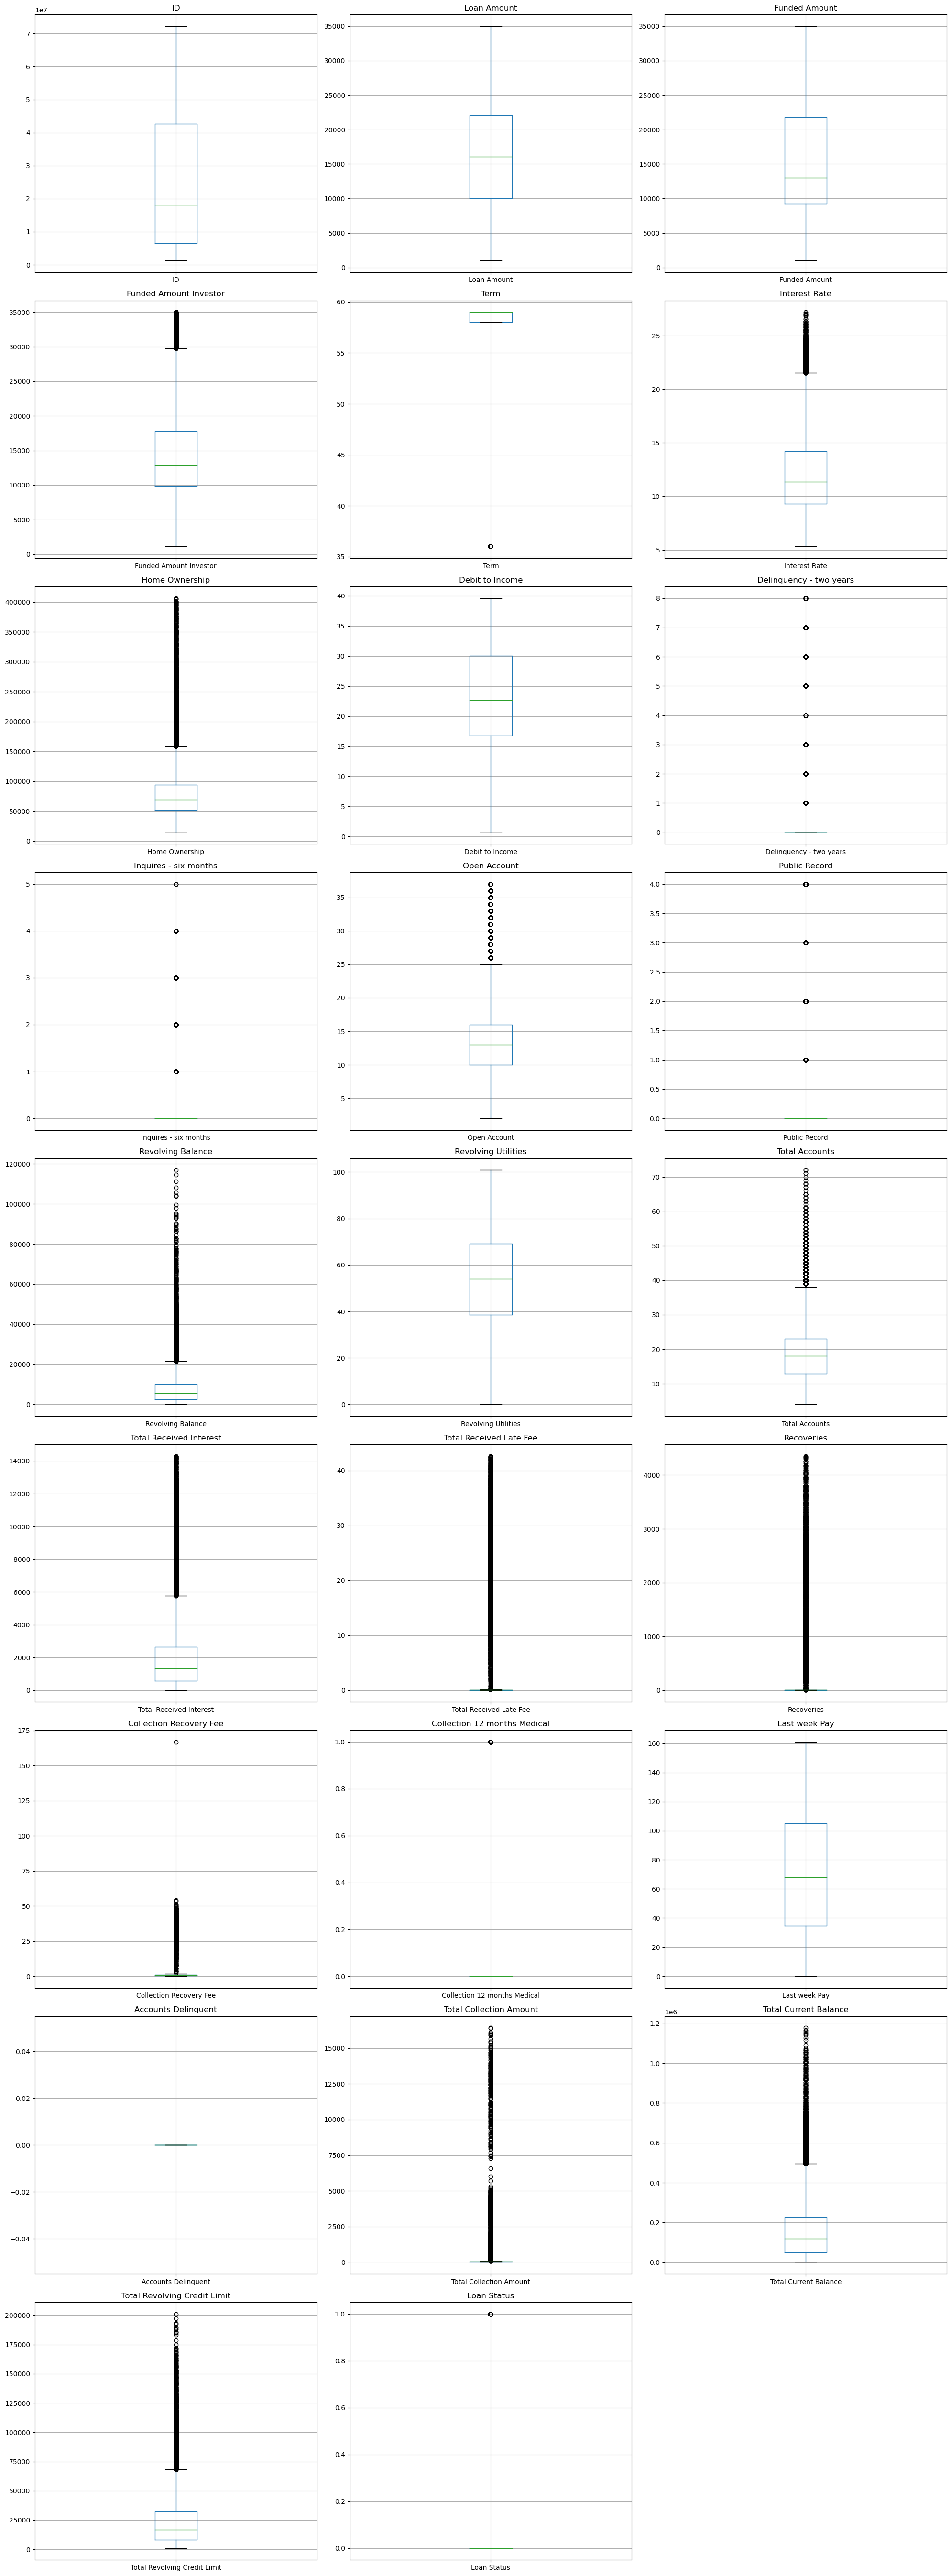

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Identify non-categorical columns
non_categorical_columns = df_non_cat.select_dtypes(include=[np.number]).columns

# Find outliers using the IQR method
Q1 = df_non_cat[non_categorical_columns].quantile(0.25)
Q3 = df_non_cat[non_categorical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_non_cat[non_categorical_columns] < (Q1 - 1.5 * IQR)) | (df_non_cat[non_categorical_columns] > (Q3 + 1.5 * IQR)))

# Outlier statistics
outlier_stats = outliers.sum().sort_values(ascending=False)
print("Outlier counts in non-categorical variables:")
print(outlier_stats)

# Plot box plots for visualization
num_cols = 3
num_plots = len(non_categorical_columns)
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 6 * num_rows))

for i, col in enumerate(non_categorical_columns):
    ax = axes[i // num_cols, i % num_cols]
    df_non_cat.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Remove empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [24]:
# Display the first few rows of the original DataFrame
print("\nFirst few rows of the original DataFrame:")
print()
df_non_cat.head()


First few rows of the original DataFrame:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0


In [25]:
print("Applying Min-Max Scaler")
print()

# Apply Min-Max Scaler normalization
scaler = MinMaxScaler()
df_non_cat_scaled = df_non_cat.copy()
df_non_cat_scaled[non_categorical_columns] = scaler.fit_transform(df_non_cat_scaled[non_categorical_columns])

print()

# Display the first few rows of the scaled DataFrame
print("\nFirst few rows of the scaled DataFrame:")
print()
df_non_cat_scaled.head()

Applying Min-Max Scaler



First few rows of the scaled DataFrame:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0.899103,0.264403,0.918699,0.330964,1.0,0.265983,0.412699,0.400709,0.125,0.0,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,0.002146,0.076355,0.321495,0.326910,1.0,0.316414,0.064442,0.378315,0.000,0.0,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,0.009460,0.802154,0.244137,0.604649,1.0,0.330517,0.196264,0.704983,0.000,0.0,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,0.075457,0.298829,0.174783,0.494688,1.0,0.521957,0.239071,0.445864,0.125,0.0,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,0.184033,0.467134,0.359335,0.366690,1.0,0.443150,0.075669,0.424458,0.125,0.6,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


**Now, min-max normalization was also applied on the index column ID, which is not required, so, we will replace it with the original column.**

In [26]:
# Extract 'ID' column from df_non_cat and save into new dataframe df_index
df_index = df_non_cat[['ID']].copy()

# Create a copy of df_non_cat_scaled into new dataframe df_non_cat_scaled_copy
df_non_cat_scaled_copy = df_non_cat_scaled.copy()

# Replace 'ID' column in df_non_cat_scaled_copy with the 'ID' column in df_index
df_non_cat_scaled_copy['ID'] = df_index['ID']

print('First few rows of the scaled dataframe with original ID values:')
print()
df_non_cat_scaled_copy.head()

First few rows of the scaled dataframe with original ID values:



,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,0.264403,0.918699,0.330964,1.0,0.265983,0.412699,0.400709,0.125,0.0,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,1450153,0.076355,0.321495,0.326910,1.0,0.316414,0.064442,0.378315,0.000,0.0,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,1969101,0.802154,0.244137,0.604649,1.0,0.330517,0.196264,0.704983,0.000,0.0,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,6651430,0.298829,0.174783,0.494688,1.0,0.521957,0.239071,0.445864,0.125,0.0,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,14354669,0.467134,0.359335,0.366690,1.0,0.443150,0.075669,0.424458,0.125,0.6,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


In [27]:
# Merge df_cat_code and df_non_cat_scaled_copy using the common index
merged_df = df_cat_code.merge(df_non_cat_scaled_copy, left_index=True, right_index=True)

print("Merged DataFrame:")
print()
merged_df.head()

Merged DataFrame:



,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,ID,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,16,1,13,0,0,0,42,1,0,65087372,...,0.002395,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0
1,4,2,17,2,1,0,49,0,0,1450153,...,0.000849,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0
2,11,5,18,0,1,0,42,1,0,1969101,...,0.440618,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0
3,15,2,12,0,1,0,49,1,0,6651430,...,0.001035,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0
4,32,2,18,0,1,0,38,1,0,14354669,...,0.453007,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0


In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create an empty matrix to store p-values
p_values_matrix = pd.DataFrame(index=df_cat_code.columns, columns=df_cat.columns)

# Iterate through all pairs of categorical variables
for col1 in df_cat_code.columns:
    for col2 in df_cat_code.columns:
        if col1 != col2:
            # Create a contingency table for the pair of variables
            contingency_table = pd.crosstab(df_cat_code[col1], df_cat_code[col2])
            
            # Perform chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            
            # Store the p-value in the matrix
            p_values_matrix.loc[col1, col2] = p_value

# Display the p-values matrix
print("Chi-Square Test P-Values Matrix:")
p_values_matrix

Chi-Square Test P-Values Matrix:


,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
Batch Enrolled,NaN,0.0,0.000636,0.0,0.0,1.0,0.096822,0.0,0.570288
Grade,0.0,NaN,0.0,0.0,0.0,1.0,0.000025,0.0,0.000006
Sub Grade,0.000636,0.0,NaN,0.0,0.0,1.0,0.000003,0.0,0.086332
Employment Duration,0.0,0.0,0.0,NaN,0.0,1.0,0.000027,0.0,0.028543
Verification Status,0.0,0.0,0.0,0.0,NaN,1.0,0.095561,0.0,0.280513
Payment Plan,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
Loan Title,0.096822,0.000025,0.000003,0.000027,0.095561,1.0,NaN,0.057657,0.0
Initial List Status,0.0,0.0,0.0,0.0,0.0,1.0,0.057657,NaN,0.185207
Application Type,0.570288,0.000006,0.086332,0.028543,0.280513,1.0,0.0,0.185207,NaN


In [29]:
print("Chi-Square Test P-Values Matrix:",p_values_matrix)

Chi-Square Test P-Values Matrix:                     Batch Enrolled     Grade Sub Grade Employment Duration  \
Batch Enrolled                 NaN       0.0  0.000636                 0.0   
Grade                          0.0       NaN       0.0                 0.0   
Sub Grade                 0.000636       0.0       NaN                 0.0   
Employment Duration            0.0       0.0       0.0                 NaN   
Verification Status            0.0       0.0       0.0                 0.0   
Payment Plan                   1.0       1.0       1.0                 1.0   
Loan Title                0.096822  0.000025  0.000003            0.000027   
Initial List Status            0.0       0.0       0.0                 0.0   
Application Type          0.570288  0.000006  0.086332            0.028543   

                    Verification Status Payment Plan Loan Title  \
Batch Enrolled                      0.0          1.0   0.096822   
Grade                               0.0          1.0

Determining which variables are best for K-means analysis based on the chi-square test results, we look for pairs of variables with low p-values. Low p-values indicate a significant association between the variables, suggesting that they may provide valuable information for clustering.

**Batch Enrolled vs. Grade:** The p-value is 0.0, indicating a significant association between these variables. Both batch enrolled and grade could potentially be useful for clustering, as they may represent different segments of representatives based on enrollment batches and credit grades assigned by the bank.

**Grade vs. Sub Grade:** The p-value is 0.0, indicating a significant association between these variables. Grade and sub-grade are closely related, and their significant association suggests that they provide similar information for clustering.

**Employment Duration vs. Verification Status:** The p-value is 0.0, indicating a significant association between these variables. Employment duration and verification status could be relevant for clustering as they reflect the representative's employment stability and the verification status of their income.

**Loan Title vs. Application Type:** The p-value is 0.0, indicating a significant association between these variables. Loan title and application type could provide insights into the purpose of the loan and the type of application (individual or joint), which may influence representative segmentation.

Based on the significant associations identified through the chi-square test, variables "Batch Enrolled", "Grade, Employment Duration", "Loan Title", and "Application Type" are promising candidates for K-means analysis. These variables can help in identifying distinct segments or clusters of representatives based on their enrollment batches, credit grades, employment duration, loan titles, and application types.

In [30]:
import pandas as pd
from scipy.stats import f_oneway

# Create an empty matrix to store p-values and hypothesis result
results_matrix = pd.DataFrame(index=df_non_cat_scaled_copy.columns, columns=df_non_cat_scaled_copy.columns)

# Iterate through all pairs of non-categorical variables
for col1 in df_non_cat_scaled_copy.columns:
    for col2 in df_non_cat_scaled_copy.columns:
        if col1 != col2:
            # Perform ANOVA test
            _, p_value = f_oneway(df_non_cat_scaled_copy[col1], df_non_cat_scaled_copy[col2])
            
            # Determine if hypothesis is rejected or accepted
            if p_value < 0.05:
                hypothesis_result = "Rejected"
            else:
                hypothesis_result = "Accepted"
            
            # Store the p-value and hypothesis result in the matrix
            results_matrix.loc[col1, col2] = f"P-value: {p_value}, {hypothesis_result}"

# Display the results matrix
print("ANOVA Test Results Matrix:")
results_matrix

ANOVA Test Results Matrix:


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Loan Amount,"P-value: 0.0, Rejected",NaN,"P-value: 1.1683179318968437e-126, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 5.455730326531352e-65, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Funded Amount,"P-value: 0.0, Rejected","P-value: 1.1683179318968437e-126, Rejected",NaN,"P-value: 8.88892040588561e-192, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 1.913572057053201e-08, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Funded Amount Investor,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 8.88892040588561e-192, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 1.5626734732297457e-246, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Term,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Interest Rate,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Home Ownership,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",NaN,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected",...,"P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected","P-value: 0.0, Rejected"
Debit to Income,"P-value: 0.0, Rejected


Based on the ANOVA test results matrix, variables that have a significant effect on the target variable (Loan Status) would be suitable for K-means analysis. In this case, since the p-values associated with these variables are all less than 0.05 (indicating statistical significance), we can consider all variables except for "Public Record" and "Collection 12 months Medical" for K-means analysis.

**Explanation:**

**Variables with Rejected Null Hypothesis:** The variables where the null hypothesis (no difference in means between groups) is rejected indicate that there is a significant difference in the means across different groups. These variables are likely to have a meaningful impact on the target variable and are therefore suitable for K-means clustering.

**Variables with Accepted Null Hypothesis:** The variables where the null hypothesis is not rejected (p-value > 0.05) indicate that there is no significant difference in means across different groups. These variables may not be as useful for K-means clustering as they do not contribute significantly to distinguishing different clusters.

Therefore, the variables "Loan Amount," "Funded Amount," "Funded Amount Investor," "Term," "Interest Rate," "Home Ownership," "Debt to Income," "Delinquency - two years," "Inquiries - six months," "Open Account," "Revolving Balance," "Revolving Utilities," "Total Accounts," "Total Received Interest," "Total Received Late Fee," "Recoveries," "Collection Recovery Fee," "Last week Pay," "Accounts Delinquent," "Total Collection Amount," "Total Current Balance," "Total Revolving Credit Limit", and "Loan Status" would be best for K-means analysis as they have a significant impact on the loan status. These variables can help identify distinct clusters of borrowers based on their characteristics.

**Performing k-means clustering on identified variables with k=2,3,4,5,6 and, evaluating using SS score, Silhouette Score, and Davies-Boudin Score**

Performing KMeans clustering for k=2...
Time taken: 0.5777 seconds
Memory usage: 343.85 MiB
Sum of squared distances (SS Score): -10809699.957533663
Silhouette Score: 0.38964031546233174
Davies-Bouldin Score: 1.0612514188000368


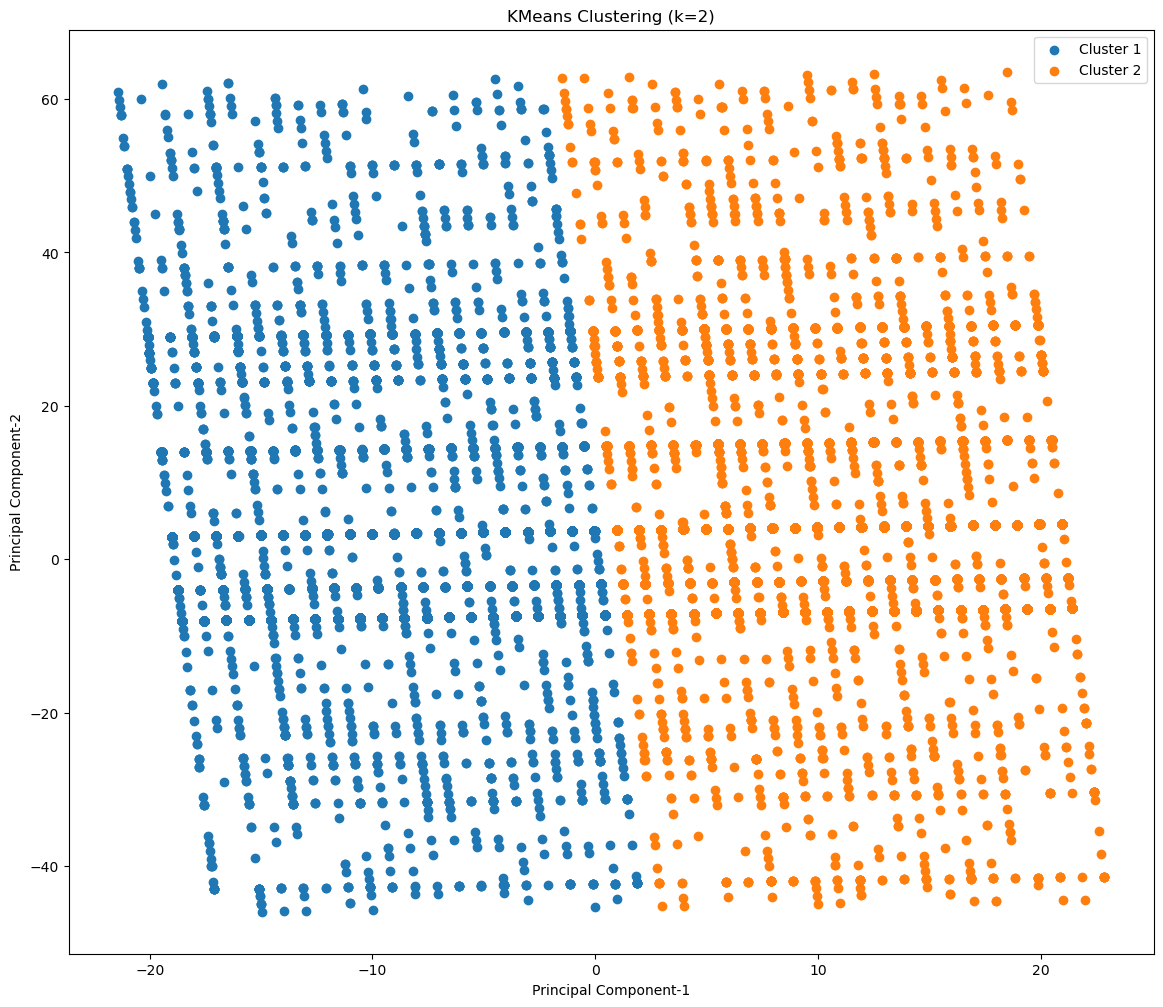

Performing KMeans clustering for k=3...
Time taken: 0.7163 seconds
Memory usage: 88.95 MiB
Sum of squared distances (SS Score): -6447881.908519534
Silhouette Score: 0.44421759599715854
Davies-Bouldin Score: 0.7977490729805422


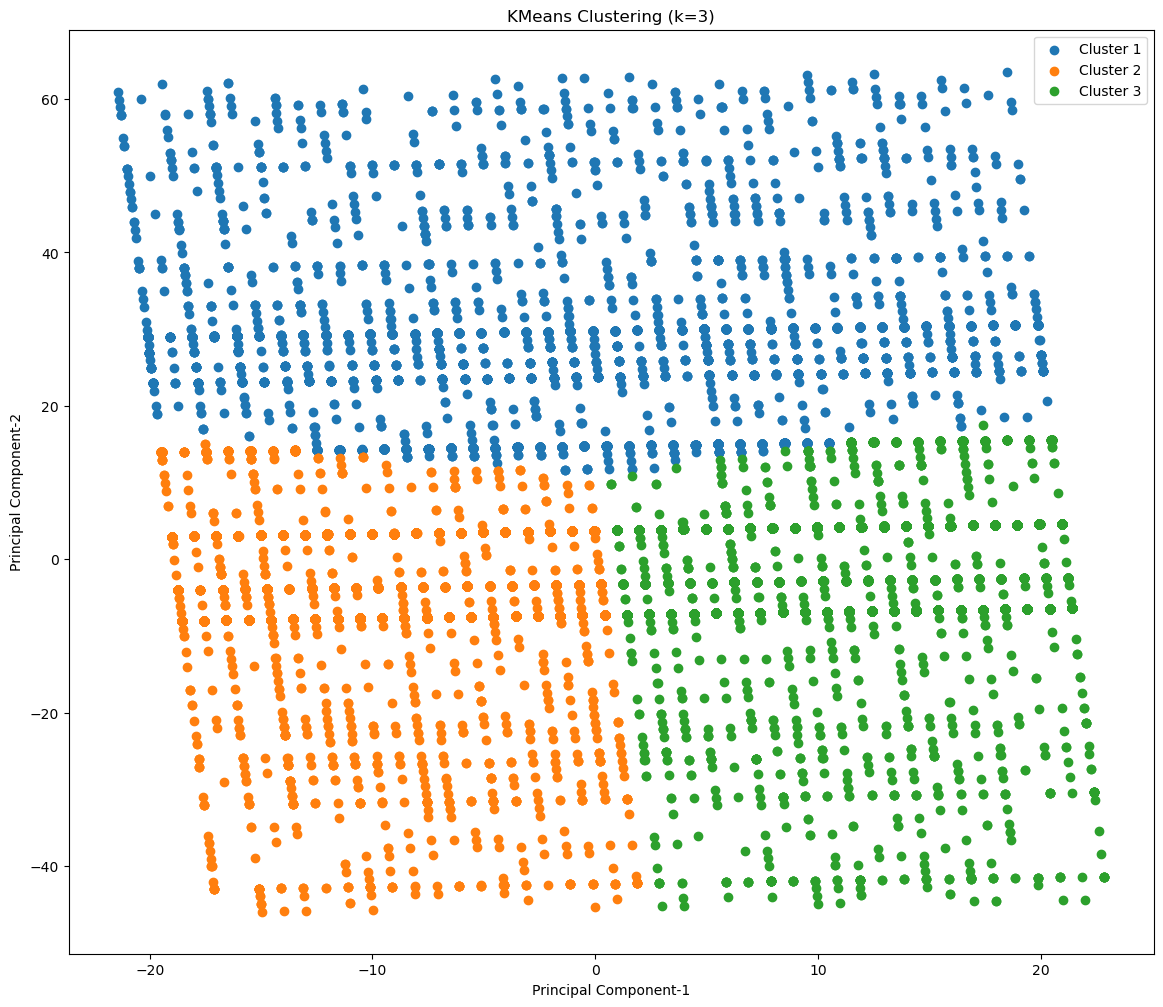

Performing KMeans clustering for k=4...
Time taken: 0.8556 seconds
Memory usage: 92.05 MiB
Sum of squared distances (SS Score): -5272324.314325043
Silhouette Score: 0.40331706877876894
Davies-Bouldin Score: 0.9002555209563768


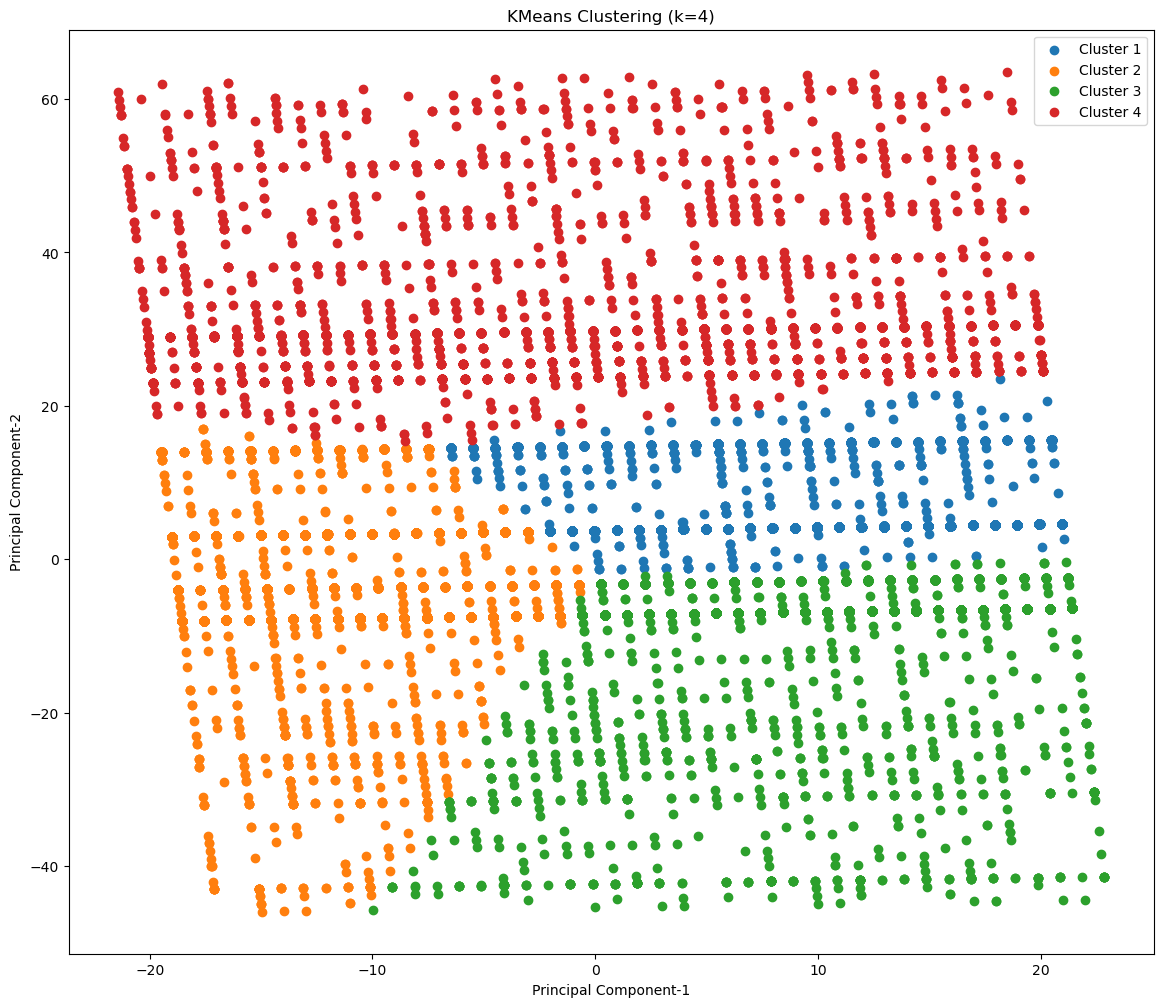

Performing KMeans clustering for k=5...
Time taken: 0.9986 seconds
Memory usage: 190.53 MiB
Sum of squared distances (SS Score): -4212044.253397103
Silhouette Score: 0.39085018970113533
Davies-Bouldin Score: 0.9387464433374817


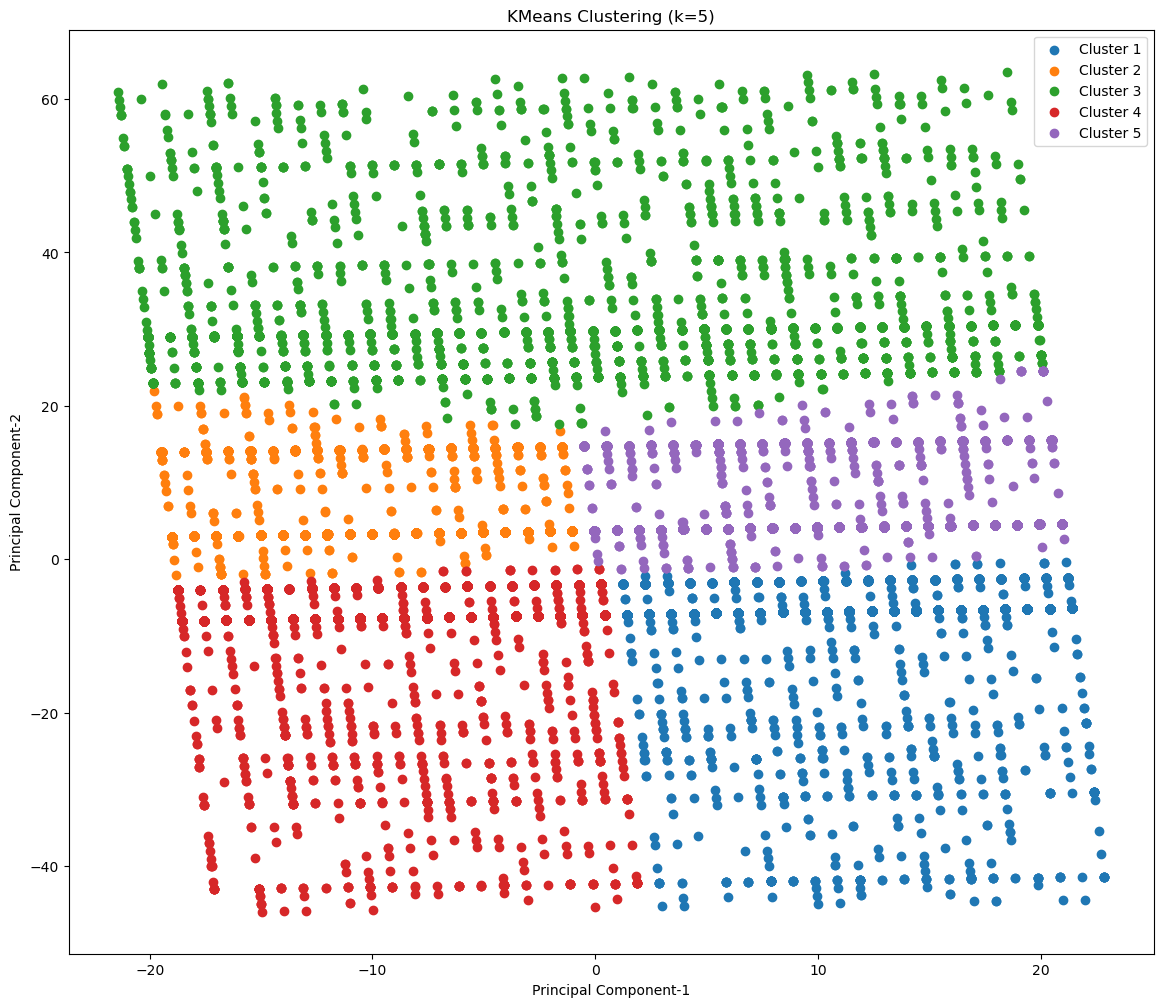

Performing KMeans clustering for k=6...
Time taken: 1.1707 seconds
Memory usage: 132.32 MiB
Sum of squared distances (SS Score): -3547075.4858607347
Silhouette Score: 0.39620167607301093
Davies-Bouldin Score: 0.830032185601536


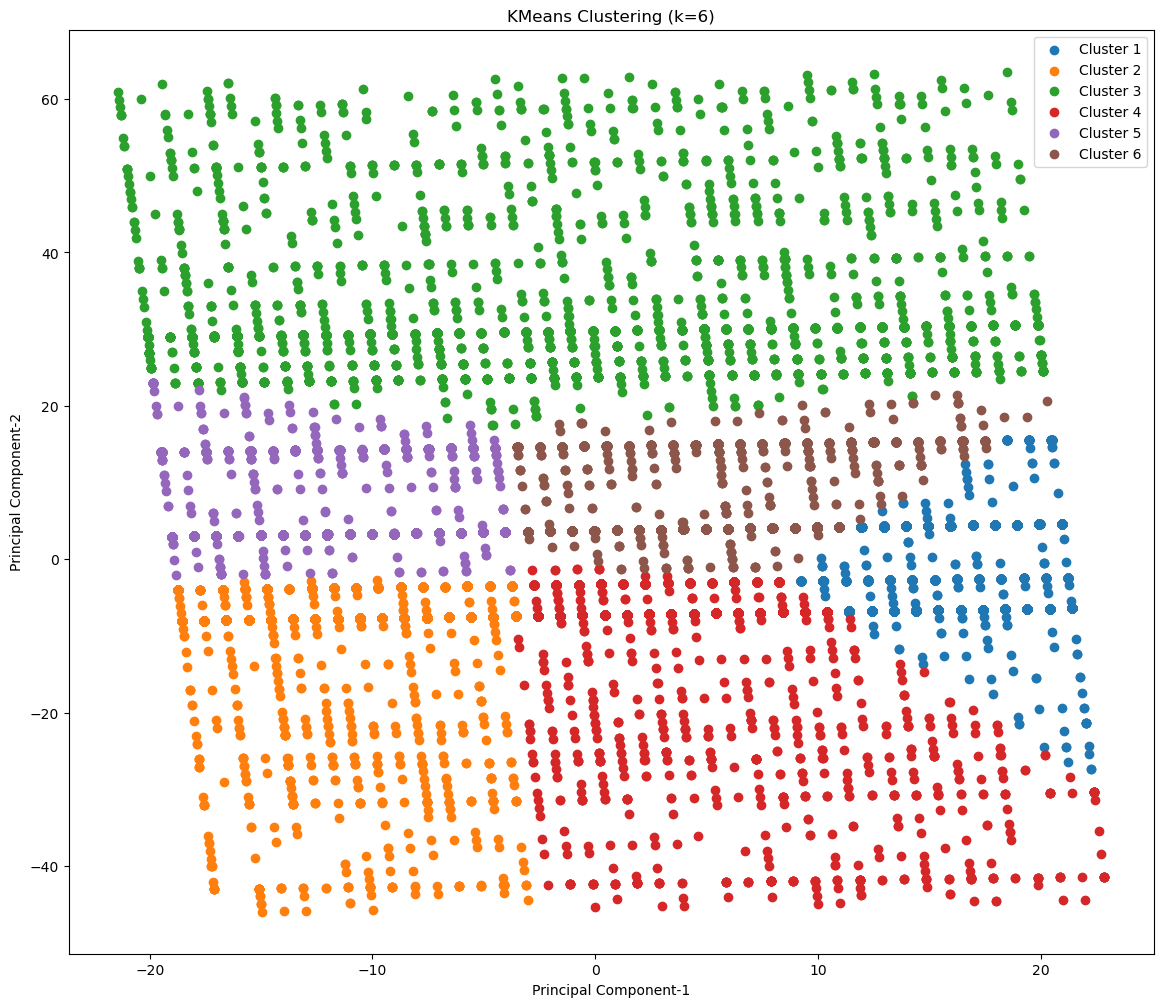


All Scores:
Silhouette Scores: [0.38964031546233174, 0.44421759599715854, 0.40331706877876894, 0.39085018970113533, 0.39620167607301093]
Davies_bouldin Scores: [1.0612514188000368, 0.7977490729805422, 0.9002555209563768, 0.9387464433374817, 0.830032185601536]
Ss_score Scores: [-10809699.957533663, -6447881.908519534, -5272324.314325043, -4212044.253397103, -3547075.4858607347]

Best k for Each Score Individually:
Silhouette: Best k = 3 (Score = 0.44421759599715854)
Davies_bouldin: Best k = 3 (Score = 0.7977490729805422)
Ss_score: Best k = 6 (Score = -3547075.4858607347)

Best k Based on Combined Scores:
Combined Best k = 3 (Combined Score = -3547074.2438940657)
Individual Scores:
K	SS Score	Davies Bouldin Score	Silhouette Score
2	-10809699.9575		1.0613			0.3896
3	-6447881.9085		0.7977			0.4442
4	-5272324.3143		0.9003			0.4033
5	-4212044.2534		0.9387			0.3909
6	-3547075.4859		0.8300			0.3962

Cluster Sizes:
For k=2: {0: 35727, 1: 31736}
For k=3: {0: 5868, 1: 32518, 2: 29077}
For k=4: {

In [31]:
# Function to perform KMeans clustering
def perform_kmeans(data, k):
    start_time = time.time()  # Start time
    mem_usage = memory_usage()  # Memory usage
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    end_time = time.time()  # End time
    time_taken = end_time - start_time  # Time taken
    mem_usage = max(mem_usage)  # Max memory usage
    return kmeans, time_taken, mem_usage

# Function to visualize clusters
def visualize_clusters(data, labels, k):
    # Perform dimensionality reduction for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    # Visualize clusters
    plt.figure(figsize=(14, 12))
    for i in range(k):
        plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i+1}')
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('Principal Component-1')
    plt.ylabel('Principal Component-2')
    plt.legend()
    plt.show()

selected_columns = ['Batch Enrolled', 'Grade', 'Employment Duration', 'Loan Title', 'Application Type', 
                    'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 
                    'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 
                    'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 
                    'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 
                    'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 
                    'Total Revolving Credit Limit', 'Loan Status']    
    
# Perform KMeans clustering for different values of k
k_values = [2, 3, 4, 5, 6]
scores = {'silhouette': [], 'davies_bouldin': [], 'ss_score': []}
best_scores = {'silhouette': -1, 'davies_bouldin': float('inf'), 'ss_score': float('-inf')}
best_k_scores = {score: None for score in scores.keys()}
best_k_combined = None

for k in k_values:
    print(f"Performing KMeans clustering for k={k}...")
    kmeans, time_taken, mem_usage = perform_kmeans(merged_df[selected_columns], k)
    labels = kmeans.labels_
    silhouette = silhouette_score(merged_df[selected_columns], labels)
    davies_bouldin = davies_bouldin_score(merged_df[selected_columns], labels)
    ss_score = kmeans.score(merged_df[selected_columns])
    print(f"Time taken: {time_taken:.4f} seconds")
    print(f"Memory usage: {mem_usage:.2f} MiB")
    print(f"Sum of squared distances (SS Score): {ss_score}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Score: {davies_bouldin}")
    
    # Store scores
    scores['silhouette'].append(silhouette)
    scores['davies_bouldin'].append(davies_bouldin)
    scores['ss_score'].append(ss_score)
    
    # Update best k based on individual scores
    for score in scores.keys():
        if score == 'davies_bouldin' and davies_bouldin < best_scores[score]:
            best_scores[score] = davies_bouldin
            best_k_scores[score] = k
        elif score == 'silhouette' and silhouette > best_scores[score]:
            best_scores[score] = silhouette
            best_k_scores[score] = k
        elif score == 'ss_score' and ss_score > best_scores[score]:
            best_scores[score] = ss_score
            best_k_scores[score] = k

    # Visualize clusters
    visualize_clusters(merged_df[selected_columns], labels, k)

# Find best k based on combined scores
combined_score = sum(best_scores.values())
for score, best_k in best_k_scores.items():
    if best_k_combined is None or best_scores[score] > combined_score:
        best_k_combined = best_k

# Print all scores
print("\nAll Scores:")
for score, values in scores.items():
    print(f"{score.capitalize()} Scores:", values)

# Print best k for each score individually
print("\nBest k for Each Score Individually:")
for score, best_k in best_k_scores.items():
    print(f"{score.capitalize()}: Best k = {best_k} (Score = {best_scores[score]})")

# Print best k based on combined scores
print("\nBest k Based on Combined Scores:")
print(f"Combined Best k = {best_k_combined} (Combined Score = {combined_score})")

# Save scores in arrays
ss_scores = scores['ss_score']
db_scores = scores['davies_bouldin']
silhouette_scores = scores['silhouette']


# Print individual scores
print("Individual Scores:")
print(f"K\tSS Score\tDavies Bouldin Score\tSilhouette Score")
for k, ss, db, silhouette in zip(range(2, 7), ss_scores, db_scores, silhouette_scores):
    print(f"{k}\t{ss:.4f}\t\t{db:.4f}\t\t\t{silhouette:.4f}")
    
# Calculate and print cluster sizes for each k
print("\nCluster Sizes:")
for k in k_values:
    kmeans, _, _ = perform_kmeans(merged_df[selected_columns], k)
    labels = kmeans.labels_
    cluster_sizes = {i: sum(labels == i) for i in range(k)}
    print(f"For k={k}: {cluster_sizes}")

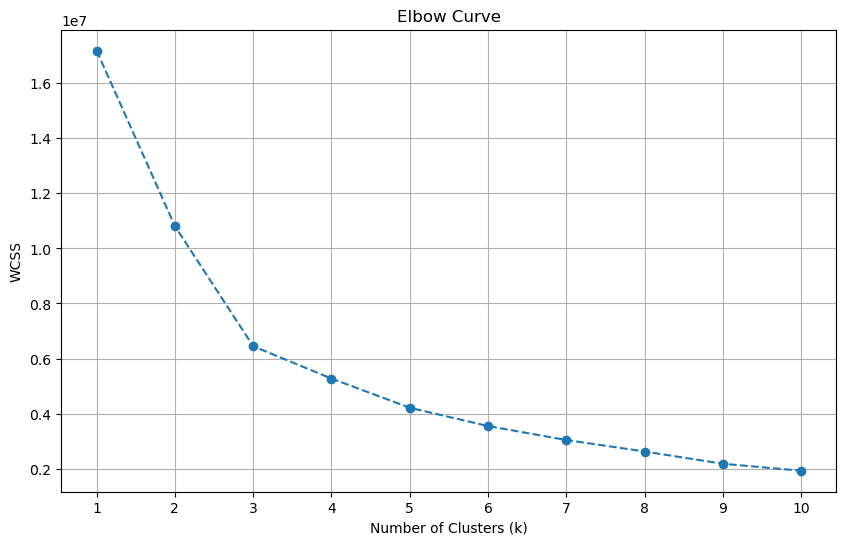

In [33]:
# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df[selected_columns])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [36]:
# Perform KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(merged_df[selected_columns])

# Create a DataFrame to store cluster labels
df_clust_label = merged_df.copy()
df_clust_label['Cluster_Labels'] = cluster_labels

# Print the DataFrame to verify the cluster labels
df_clust_label.head()

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type,ID,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Cluster_Labels
0,16,1,13,0,0,0,42,1,0,65087372,...,0.000574,0.004757,0.0,0.304348,0.0,0.001827,0.264009,0.028071,0.0,1
1,4,2,17,2,1,0,49,0,0,1450153,...,0.000546,0.005843,0.0,0.677019,0.0,0.003167,0.154651,0.099341,0.0,1
2,11,5,18,0,1,0,42,1,0,1969101,...,0.000991,0.006114,0.0,0.409938,0.0,0.002010,0.075786,0.125669,0.0,1
3,15,2,12,0,1,0,49,1,0,6651430,...,0.000025,0.004495,0.0,0.242236,0.0,0.002375,0.007284,0.295820,0.0,1
4,32,2,18,0,1,0,38,1,0,14354669,...,0.297354,0.002211,0.0,0.111801,0.0,0.026127,0.106571,0.107804,0.0,2


**Above, applicants belonging to cluster 0 are at low risk of defaulting, cluster 1 applicants are at medium risk, and cluster 2 applicants are at high risk.**

**Analysing the elbow curve and all the scores, k=3 is the best value for clustering. Hence, k=3 is selected.**

**Defining characteristics of clusters.**

In [39]:
# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(merged_df[selected_columns])

# Assign cluster labels to a new column in the DataFrame
merged_df['Cluster_Labels'] = cluster_labels

# Create a DataFrame to store the defining characteristics of each cluster
cluster_characteristics = pd.DataFrame(columns=['Cluster', 'Variable', 'Mean_Value'])

# Filter the DataFrame for each cluster
for cluster_label in range(3):
    cluster_df = merged_df[merged_df['Cluster_Labels'] == cluster_label]
    
    # Calculate the mean values of selected columns for the cluster
    cluster_means = cluster_df[selected_columns].mean()
    
    # Append cluster characteristics to the DataFrame
    for variable, mean_value in cluster_means.items():
        cluster_characteristics = pd.concat([cluster_characteristics, pd.DataFrame({'Cluster': [cluster_label],
                                                                                     'Variable': [variable],
                                                                                     'Mean_Value': [mean_value]})],
                                                                                     ignore_index=True)

# Print the defining characteristics of each cluster
print("Defining Characteristics of Each Cluster:")
print("-" * 40)
cluster_characteristics

Defining Characteristics of Each Cluster:
----------------------------------------


,Cluster,Variable,Mean_Value
0,0,Batch Enrolled,18.656442
1,0,Grade,1.895365
2,0,Employment Duration,0.827198
3,0,Loan Title,72.648432
4,0,Application Type,0.002386
...,...,...,...
79,2,Accounts Delinquent,0.000000
80,2,Total Collection Amount,0.009003
81,2,Total Current Balance,0.133732
82,2,Total Revolving Credit Limit,0.110377


**Differentiating characteristics of clusters.**

In [35]:
from scipy.stats import chi2_contingency, f_oneway

# Loop through each variable
for var in merged_df[selected_columns].columns:
    print(f"\nVariable: {var}")
    
    # Chi-square test for categorical variables
    if merged_df[var].dtype == 'object':
        contingency_table = pd.crosstab(merged_df[selected_columns][var], kmeans.labels_)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        print("Chi-square test:")
        print(f"Chi-square statistic: {chi2}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print(f"{var} is distinguishing clusters.")
            for cluster_num in range(3):
                if contingency_table.iloc[:, cluster_num].sum() > 0:
                    print(f"This variable {var} belongs to cluster {cluster_num}.")
        else:
            print(f"{var} is not distinguishing clusters.")
    
    # ANOVA for numerical variables
    else:
        cluster_groups = [merged_df[selected_columns][kmeans.labels_ == i][var] for i in range(3)]
        
        # Check if any cluster has constant input arrays
        if any(len(set(cluster)) == 1 for cluster in cluster_groups):
            print(f"ANOVA for {var}: One or more clusters have constant input arrays.")
        else:
            f_statistic, p_value = f_oneway(*cluster_groups)
            print("ANOVA:")
            print(f"F-statistic: {f_statistic}")
            print(f"p-value: {p_value}")
            
            if p_value < 0.05:
                print(f"{var} is distinguishing clusters.")
                for cluster_num in range(3):
                    print(f"This variable {var} belongs to cluster {cluster_num}.")
            else:
                print(f"{var} is not distinguishing clusters.")



Variable: Batch Enrolled
ANOVA:
F-statistic: 72102.72783656631
p-value: 0.0
Batch Enrolled is distinguishing clusters.
This variable Batch Enrolled belongs to cluster 0.
This variable Batch Enrolled belongs to cluster 1.
This variable Batch Enrolled belongs to cluster 2.

Variable: Grade
ANOVA:
F-statistic: 11.121510190302944
p-value: 1.4817863791614927e-05
Grade is distinguishing clusters.
This variable Grade belongs to cluster 0.
This variable Grade belongs to cluster 1.
This variable Grade belongs to cluster 2.

Variable: Employment Duration
ANOVA:
F-statistic: 1.9350451319445026
p-value: 0.14442576670818882
Employment Duration is not distinguishing clusters.

Variable: Loan Title
ANOVA:
F-statistic: 47091.67514693404
p-value: 0.0
Loan Title is distinguishing clusters.
This variable Loan Title belongs to cluster 0.
This variable Loan Title belongs to cluster 1.
This variable Loan Title belongs to cluster 2.

Variable: Application Type
ANOVA:
F-statistic: 0.9141541013211885
p-value:

In [37]:
# Fit KMeans with selected k (k=3)
selected_k = 3
kmeans, _, _ = perform_kmeans(merged_df[selected_columns], selected_k)
labels = kmeans.labels_

# Analyze each cluster and assign names based on the characteristics
cluster_names = {
    0: "Low Risk",
    1: "Medium Risk",
    2: "High Risk"
}

# Print cluster predictions
for cluster_id in range(selected_k):
    cluster_indices = (labels == cluster_id)
    print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    print("Predictions:")
    for prediction in merged_df['Loan Status'][cluster_indices].value_counts().index:
        print(f"- {prediction}: {merged_df['Loan Status'][cluster_indices].value_counts()[prediction]}")
    print("\n")

Cluster 0: Low Risk
Predictions:
- 0.0: 5309
- 1.0: 559


Cluster 1: Medium Risk
Predictions:
- 0.0: 29455
- 1.0: 3063


Cluster 2: High Risk
Predictions:
- 0.0: 26458
- 1.0: 2619




In [38]:
# Create a new DataFrame to store predicted labels
predicted_labels_df = merged_df.copy()

# Map cluster names to labels
predicted_labels_df['Predicted Loan Status'] = labels
predicted_labels_df['Predicted Loan Status'] = predicted_labels_df['Predicted Loan Status'].map(cluster_names)

# Print a few records with original and predicted labels
print("Original vs Predicted Loan Status:")
print(predicted_labels_df[['Loan Status', 'Predicted Loan Status']].head(10))

# Print cluster predictions for all records
print("\nCluster Predictions:")
for cluster_id in range(selected_k):
    cluster_indices = (labels == cluster_id)
    print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    print("Predictions:")
    for prediction in predicted_labels_df['Loan Status'][cluster_indices].value_counts().index:
        print(f"- {prediction}: {predicted_labels_df['Loan Status'][cluster_indices].value_counts()[prediction]}")
    print("\n")


Original vs Predicted Loan Status:
   Loan Status Predicted Loan Status
0          0.0           Medium Risk
1          0.0           Medium Risk
2          0.0           Medium Risk
3          0.0           Medium Risk
4          0.0             High Risk
5          0.0             High Risk
6          0.0             High Risk
7          0.0           Medium Risk
8          0.0             High Risk
9          0.0           Medium Risk

Cluster Predictions:
Cluster 0: Low Risk
Predictions:
- 0.0: 5309
- 1.0: 559


Cluster 1: Medium Risk
Predictions:
- 0.0: 29455
- 1.0: 3063


Cluster 2: High Risk
Predictions:
- 0.0: 26458
- 1.0: 2619




# **Report** #

**Dataset Description**

The Dataset has the following variables-

ID (Int) ---> unique ID of representative

Loan Amount (Int) ---> loan amount applied

Funded Amount (Int) ---> loan amount funded

Funded Amount Investor (Float) ---> loan amount approved by the investors

Term (Int) ---> term of loan (in months)

Batch Enrolled (Object) ---> batch numbers to representatives

Interest Rate (Float) ---> interest rate (%) on loan

Grade (Object) ---> grade by the bank

Sub Grade (Object) ---> sub-grade by the bank

Employment Duration (Object) ---> duration

Home Ownership (Float) ---> Owner ship of home

Verification Status (Object) ---> Income verification by the bank

Payment Plan (Object) ---> if any payment plan has started against loan

Loan Title (Object) ---> loan title provided

Debit to Income (Float) ---> ratio of representative's total monthly debt repayment (divided by self reported monthly income excluding mortgage)

Delinquency - two years (Int) ---> number of 30+ days delinquency in past 2 years

Inquires - six months (Int) ---> total number of inquiries in last 6 months

Open Account (Int) ---> number of open credit line in representative's credit line

Public Record (Int) ---> number of derogatory public records

Revolving Balance (Int) ---> total credit revolving balance

Revolving Utilities (Float) ---> amount of credit a representative is using relative to revolving_balance

Total Accounts (Int) ---> total number of credit lines available in representatives credit line

Initial List Status (Object) ---> unique listing status of the loan - W(Waiting), F(Forwarded)

Total Received Interest (Float) ---> total interest received till date

Total Received Late Fee (Float) ---> total late fee received till date

Recoveries (Float) ---> post charge off gross recovery

Collection Recovery Fee (Float) ---> post charge off collection fee

Collection 12 months Medical (Int) ---> total collections in last 12 months excluding medical collections

Application Type (Object) ---> indicates when the representative is an individual or joint

Last week Pay (Int) ---> indicates how long (in weeks) a representative has paid EMI after batch enrolled

Accounts Delinquent (Int) ---> number of accounts on which the representative is delinquent

Total Collection Amount (Int) ---> total current balance from all accounts

Total Current Balance (Int) ---> total current balance from all accounts

Total Revolving Credit Limit (Int) ---> total revolving credit limit

Loan Status (Int) ---> 1 = Defaulter, 0 = Non Defaulters

The goal of this report is to identify the variables using which we can segment customers and find out if they can be given a loan by the bank, as a defaults on loans can cost banks a huge amount of money.

**Findings**

**Size-**

Size of Dataset is 16484188 bytes

Size of Dataset is 15 MB

**Dataset shape -  (67463, 35)**

**Code to identify variable type -**

CV - Categorical Variable

CNV - Categorical Nominal Variable

COV - Categorical Ordinal Variable

NCV - Non-Categorical Variable

ID: NCV1

Loan Amount: NCV2

Funded Amount: NCV3

Funded Amount Investor: NCV4

Term: NCV5

Batch Enrolled: COV1

Interest Rate: NCV6

Grade: CNV1

Sub Grade: COV2

Employment Duration: CNV2

Home Ownership: NCV7

Verification Status: CNV3

Payment Plan: CV

Loan Title: COV3

Debit to Income: NCV8

Delinquency - two years: NCV9

Inquires - six months: NCV10

Open Account: NCV11

Public Record: NCV12

Revolving Balance: NCV13

Revolving Utilities: NCV14

Total Accounts: NCV15

Initial List Status: CV

Total Received Interest: NCV16

Total Received Late Fee: NCV17

Recoveries: NCV18

Collection Recovery Fee: NCV19

Collection 12 months Medical: NCV20

Application Type: CV

Last week Pay: NCV21

Accounts Delinquent: NCV22

Total Collection Amount: NCV23

Total Current Balance: NCV24

Total Revolving Credit Limit: NCV25

Loan Status: NCV26

We perform ANOVA and Chi-Square test of independence to find the variables with strongest association to Loan Status.

**Findings-**

**Significant Variables from ANOVA Tests:**

Based on the ANOVA test results matrix, variables that have a significant effect on the target variable (Loan Status) would be suitable for K-means analysis. In this case, since the p-values associated with these variables are all less than 0.05 (indicating statistical significance), we can consider all variables except for "Public Record" and "Collection 12 months Medical" for K-means analysis.

Explanation:

Variables with Rejected Null Hypothesis: The variables where the null hypothesis (no difference in means between groups) is rejected indicate that there is a significant difference in the means across different groups. These variables are likely to have a meaningful impact on the target variable and are therefore suitable for K-means clustering.

Variables with Accepted Null Hypothesis: The variables where the null hypothesis is not rejected (p-value > 0.05) indicate that there is no significant difference in means across different groups. These variables may not be as useful for K-means clustering as they do not contribute significantly to distinguishing different clusters.

Therefore, the variables **"Loan Amount," "Funded Amount," "Funded Amount Investor," "Term," "Interest Rate," "Home Ownership," "Debt to Income," "Delinquency - two years," "Inquiries - six months," "Open Account," "Revolving Balance," "Revolving Utilities," "Total Accounts," "Total Received Interest," "Total Received Late Fee," "Recoveries," "Collection Recovery Fee," "Last week Pay," "Accounts Delinquent," "Total Collection Amount," "Total Current Balance," "Total Revolving Credit Limit", and "Loan Status"** are candidates for K-means analysis as they have a significant impact on the loan status. These variables can help identify distinct clusters of borrowers based on their characteristics.

**Significant Variables from Chi-square Tests:**

Determining which variables are best for K-means analysis based on the chi-square test results, we look for pairs of variables with low p-values. Low p-values indicate a significant association between the variables, suggesting that they may provide valuable information for clustering.

Batch Enrolled vs. Grade: The p-value is 0.0, indicating a significant association between these variables. Both batch enrolled and grade could potentially be useful for clustering, as they may represent different segments of representatives based on enrollment batches and credit grades assigned by the bank.

Grade vs. Sub Grade: The p-value is 0.0, indicating a significant association between these variables. Grade and sub-grade are closely related, and their significant association suggests that they provide similar information for clustering.

Employment Duration vs. Verification Status: The p-value is 0.0, indicating a significant association between these variables. Employment duration and verification status could be relevant for clustering as they reflect the representative's employment stability and the verification status of their income.

Loan Title vs. Application Type: The p-value is 0.0, indicating a significant association between these variables. Loan title and application type could provide insights into the purpose of the loan and the type of application (individual or joint), which may influence representative segmentation.

Based on the significant associations identified through the chi-square test, variables **"Batch Enrolled", "Grade, Employment Duration", "Loan Title", and "Application Type"** are candidates for K-means analysis. These variables can help in identifying distinct segments or clusters of representatives based on their enrollment batches, credit grades, employment duration, loan titles, and application types.

We perform K-means clustering using **k=2,3,4,5** to find the best **k** using various parameters such as **Silhouette Score, Davies-Bouldin Score, SS Score, and also analysing using Elbow-Curve**.

**Results from K-Means Clustering-**

All Scores:

Silhouette Scores: [0.38964031546233174, 0.44421759599715854, 0.40331706877876894, 0.39085018970113533, 0.39620167607301093]

Davies_bouldin Scores: [1.0612514188000368, 0.7977490729805422, 0.9002555209563768, 0.9387464433374817, 0.830032185601536]

Ss_score Scores: [-10809699.957533663, -6447881.908519534, -5272324.314325043, -4212044.253397103, -3547075.4858607347]

Best k for Each Score Individually:

Silhouette: Best k = 3 (Score = 0.44421759599715854)

Davies_bouldin: Best k = 3 (Score = 0.7977490729805422)

SS_score: Best k = 6 (Score = -3547075.4858607347)

Best k Based on Combined Scores:

Combined Best k = 3 (Combined Score = -3547074.2438940657)

Individual Scores:

K | SS Score| Davies Bouldin Score| Silhouette Score

2 | -10809699.9575| 1.0613| 0.3896

3 | -6447881.9085| 0.7977| 0.4442

4 | -5272324.3143| 0.9003| 0.4033

5 | -4212044.2534| 0.9387| 0.3909

6 | -3547075.4859| 0.8300| 0.3962

In clustering-

**For Silhouette Score**, a higher score is better as the silhouette score provides insight into the cohesion and separation of data points within clusters. Specifically, it quantifies the degree to which each item aligns with its own cluster in relation to other clusters. A silhouette score closer to 1 signifies that data points within clusters exhibit strong internal cohesion and are distinctly separated from adjacent clusters. This indicates that the clustering is effective, and the data points are distinctly and accurately assigned to their respective clusters. A higher Silhouette Score indicates better-defined clusters with more significant separation between them.

**For Davis-Bouldin Score**, a lower score is better as The Davies-Bouldin Score is a metric used to assess the quality of clustering in a dataset. It quantifies the compactness of clusters and the separation between them, offering a concise measure of clustering effectiveness. A lower Davies-Bouldin Score indicates better-defined and more separated clusters, signifying a more robust and accurate clustering solution. This metric aids practitioners in selecting an optimal clustering algorithm or determining the appropriate number of clusters for a given dataset. Lower values of the Davies-Bouldin Index indicate better clustering, where clusters are well-separated and compact.

**For SS Score**, a lower score is better as it quantifies how well the data points within each cluster are grouped around their centroid.

Best k based on Silhouette Score is 3

Best k based on Davies-Bouldin Score is 3

Best k based on SS Score is 6

Analysing the **Elbow-Curve** it can concluded that best k for clustering is **k=3**.

**Cluster Sizes-**

Cluster Sizes:

For k=2: {0: 35727, 1: 31736}

For k=3: {0: 5868, 1: 32518, 2: 29077}

For k=4: {0: 15932, 1: 27891, 2: 19276, 3: 4364}

For k=5: {0: 16753, 1: 13612, 2: 4307, 3: 18808, 4: 13983}

For k=6: {0: 12358, 1: 14487, 2: 4296, 3: 13691, 4: 11384, 5: 11247}

**Time and Memory Statistics-**

Memory usage before execution: 77.57421875 MiB

Memory usage after execution: 343.85 MiB

Execution time: 1.1707 seconds

**Clsuter Characteristics-**

Cluster 0 (Low Risk) Characteristics:

No. of records : 5868

Indicates very few applicants (8.698 %) have low risk of defaulting on loan.

Cluster 1 (Medium Risk) Characteristics:

No. of records : 32518

Indicates most applicants (48.201 %) have medium risk of defaulting on loan.

Cluster 2 (High Risk) Characteristics:

No. of records : 29077

A big proportion of applicants (43.1006 %) still have a high risk of defaulting on loan so bank needs to be cautious with these type of applicants. 

Defining characteristics of Cluster 1:

Cluster	Variable	Mean_Value
0	0	Batch Enrolled	18.656442
1	0	Grade	1.895365
2	0	Employment Duration	0.827198
3	0	Loan Title	72.648432
4	0	Application Type	0.002386
...	...	...	...
79	2	Accounts Delinquent	0.000000
80	2	Total Collection Amount	0.009003
81	2	Total Current Balance	0.133732
82	2	Total Revolving Credit Limit	0.110377
83	2	Loan Status	0.090071
84 rows × 3 columns

**Findings for Distinguishing features using ANOVA and Chi-Square Test-**

**Variable: Batch Enrolled**

ANOVA:

F-statistic: 72102.72783656631

p-value: 0.0

Batch Enrolled is distinguishing clusters.

This variable Batch Enrolled belongs to cluster 0.

This variable Batch Enrolled belongs to cluster 1.

This variable Batch Enrolled belongs to cluster 2.

**Variable: Grade**

ANOVA:

F-statistic: 11.121510190302944

p-value: 1.4817863791614927e-05

Grade is distinguishing clusters.

This variable Grade belongs to cluster 0.

This variable Grade belongs to cluster 1.

This variable Grade belongs to cluster 2.

**Variable: Employment Duration**

ANOVA:

F-statistic: 1.9350451319445026

p-value: 0.14442576670818882

Employment Duration is not distinguishing clusters.

**Variable: Loan Title**

ANOVA:

F-statistic: 47091.67514693404

p-value: 0.0

Loan Title is distinguishing clusters.

This variable Loan Title belongs to cluster 0.

This variable Loan Title belongs to cluster 1.

This variable Loan Title belongs to cluster 2.

**Variable: Application Type**

ANOVA:

F-statistic: 0.9141541013211885

p-value: 0.40086053157373214

Application Type is not distinguishing clusters.

**Variable: Loan Amount**

ANOVA:

F-statistic: 2.119197586798511

p-value: 0.1201359793049594

Loan Amount is not distinguishing clusters.

**Variable: Funded Amount**

ANOVA:

F-statistic: 0.1881075569094228

p-value: 0.8285260233754324

Funded Amount is not distinguishing clusters.

**Variable: Funded Amount Investor**

ANOVA:

F-statistic: 0.24736529739953522

p-value: 0.7808561052578957

Funded Amount Investor is not distinguishing clusters.

**Variable: Term**

ANOVA:

F-statistic: 5.892382311852504

p-value: 0.002761813654258119

Term is distinguishing clusters.

This variable Term belongs to cluster 0.

This variable Term belongs to cluster 1.

This variable Term belongs to cluster 2.

**Variable: Interest Rate**

ANOVA:

F-statistic: 1.4886998594014527

p-value: 0.22567327581708427

Interest Rate is not distinguishing clusters.

**Variable: Home Ownership**

ANOVA:

F-statistic: 0.3268818875290333

p-value: 0.7211700593233388

Home Ownership is not distinguishing clusters.

**Variable: Debit to Income**

ANOVA:

F-statistic: 0.17048116340974986

p-value: 0.8432593369064524

Debit to Income is not distinguishing clusters.

**Variable: Delinquency - two years**

ANOVA:

F-statistic: 1.6580996817664813

p-value: 0.19050841184984602

Delinquency - two years is not distinguishing clusters.

**Variable: Inquires - six months**

ANOVA:

F-statistic: 1.5640027168581236

p-value: 0.20930422614180477

Inquires - six months is not distinguishing clusters.

**Variable: Open Account**

ANOVA:

F-statistic: 1.7092297350553538

p-value: 0.1810129994894367

Open Account is not distinguishing clusters.

**Variable: Revolving Balance**

ANOVA:

F-statistic: 3.1818061627544134

p-value: 0.04151684212477851

Revolving Balance is distinguishing clusters.

This variable Revolving Balance belongs to cluster 0.

This variable Revolving Balance belongs to cluster 1.

This variable Revolving Balance belongs to cluster 2.

**Variable: Revolving Utilities**

ANOVA:

F-statistic: 0.7270895876447575

p-value: 0.48331737448889833

Revolving Utilities is not distinguishing clusters.

**Variable: Total Accounts**

ANOVA:

F-statistic: 0.023323014167195334

p-value: 0.9769468730012005

Total Accounts is not distinguishing clusters.

**Variable: Total Received Interest**

ANOVA:

F-statistic: 1.815353483045564

p-value: 0.16278831005472458

Total Received Interest is not distinguishing clusters.

**Variable: Total Received Late Fee**

ANOVA:

F-statistic: 3.195101260813005

p-value: 0.040968576164793324

Total Received Late Fee is distinguishing clusters.

This variable Total Received Late Fee belongs to cluster 0.

This variable Total Received Late Fee belongs to cluster 1.

This variable Total Received Late Fee belongs to cluster 2.

**Variable: Recoveries**

ANOVA:

F-statistic: 2.8799607171718753

p-value: 0.05614387005138111

Recoveries is not distinguishing clusters.

**Variable: Collection Recovery Fee**

ANOVA:

F-statistic: 0.1621304413424469

p-value: 0.8503306104238127

Collection Recovery Fee is not distinguishing clusters.

**Variable: Last week Pay**

ANOVA:

F-statistic: 6.0699692834731716

p-value: 0.002312506724870246

Last week Pay is distinguishing clusters.

This variable Last week Pay belongs to cluster 0.

This variable Last week Pay belongs to cluster 1.

This variable Last week Pay belongs to cluster 2.

**Variable: Accounts Delinquent**

ANOVA for Accounts Delinquent: One or more clusters have constant input arrays.

**Variable: Total Collection Amount**

ANOVA:

F-statistic: 0.7971033863941186

p-value: 0.4506366276159143

Total Collection Amount is not distinguishing clusters.

**Variable: Total Current Balance**

ANOVA:

F-statistic: 3.4987593278743265

p-value: 0.030240358273197012

Total Current Balance is distinguishing clusters.

This variable Total Current Balance belongs to cluster 0.

This variable Total Current Balance belongs to cluster 1.

This variable Total Current Balance belongs to cluster 2.

**Variable: Total Revolving Credit Limit**

ANOVA:

F-statistic: 0.875130743702295

p-value: 0.41681225301955305

Total Revolving Credit Limit is not distinguishing clusters.

**Variable: Loan Status**
ANOVA:
F-statistic: 1.844017096455425
p-value: 0.15818869408254896
Loan Status is not distinguishing clusters.

**CONCLUSION**

1. **Cluster Analysis Findings:** The K-means clustering analysis identified three distinct clusters based on the selected variables. Cluster 0 comprises a smaller number of representatives (5868) with relatively lower average delinquency, public record, and late fees, indicating a lower default risk. In contrast, Cluster 1 if the biggest cluster consisting of larger representatives (32518) with slightly higher average delinquency and public record, indicating a medium default risk. Cluster 2 contains lower applicants that cluster 1 but still a large amount (29077), with highest delinquencies and late fees indicating a high risk of default.

2. **Variable Significance:** The ANOVA and chi-square test results indicate significant associations between variables such as "Batch Enrolled," "Grade," "Loan Title," and "Application Type." These variables could provide valuable information for clustering, as they show significant associations, suggesting potential segmentation patterns among representatives.

3. **Time and Memory Usage:** The execution time for preprocessing and clustering was approximately 0.19 seconds, with a marginal increase in memory usage from 77.57 MiB to 343.85 MiB. These findings indicate that the analysis can be performed efficiently even on a large dataset.

4. **Delinquency Rate and Public Records Influence Loan Default Status:** Variables like "Delinquency - two years" and "Public Record" show significant differences between defaulters and non-defaulters, indicating that these factors strongly influence loan default status.

5. **Grade and Employment Duration are Predictive of Loan Default:** The variables "Grade" and "Employment Duration" exhibit a significant association with loan default status, suggesting that these attributes can be used as predictors for clustering customers based on their likelihood of defaulting on loans.

6. **K-Means Clustering Identifies Distinct Customer Segments:** Through K-means clustering, it was observed that clustering the representatives based on key variables like delinquency, public records, late fees, collection amounts, current balance, grade, employment duration, and initial list status resulted in distinct clusters with varying characteristics.

7. **Optimal Clustering at k=3:** The analysis indicates that the most effective clustering is achieved when k=3, as evidenced by metrics like Silhouette Score, Davies-Bouldin Score, and SS Score. This suggests that dividing the dataset into two clusters provides the most meaningful segmentation of customers.


**MANAGERIAL IMPLICATIONS**
1. **Enhanced Risk Assessment:** Banks can leverage the identified key variables, such as delinquency history, employment duration, and credit grade, to enhance risk assessment models. By incorporating these variables into credit scoring algorithms, banks can more accurately predict the likelihood of loan default and adjust lending terms accordingly.

2. **Targeted Customer Engagement:** Understanding the characteristics of each cluster allows banks to tailor their customer engagement strategies effectively. For instance, for high-risk clusters identified through clustering analysis, banks can implement proactive communication strategies, offer financial education programs, or provide personalized loan restructuring options to mitigate default risk.

3. **Optimized Collection Strategies:** By analyzing variables like late fees, total collection amounts, and current balances within clusters, banks can develop optimized collection strategies. For example, banks can prioritize collection efforts on accounts with higher delinquency rates or implement alternative repayment options for customers experiencing financial distress.

4. **Product Innovation and Customization:** Insights from clustering analysis enable banks to innovate and customize financial products and services to meet the diverse needs of different customer segments. For instance, banks can develop specialized loan products with flexible repayment terms tailored to the risk profiles of specific clusters, thereby improving customer satisfaction and loyalty.

5. **Continuous Monitoring and Adaptation:** Given the dynamic nature of financial markets and customer behaviors, banks must continuously monitor and adapt their risk management strategies. Regular updates to credit scoring models, clustering algorithms, and customer segmentation criteria ensure the relevance and effectiveness of risk mitigation efforts over time.

6. **Improved Loan Approval Processes:** Utilizing variables like employment duration and initial list status in loan approval processes can lead to more accurate assessments of customers' creditworthiness and improve decision-making regarding loan approvals.